This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

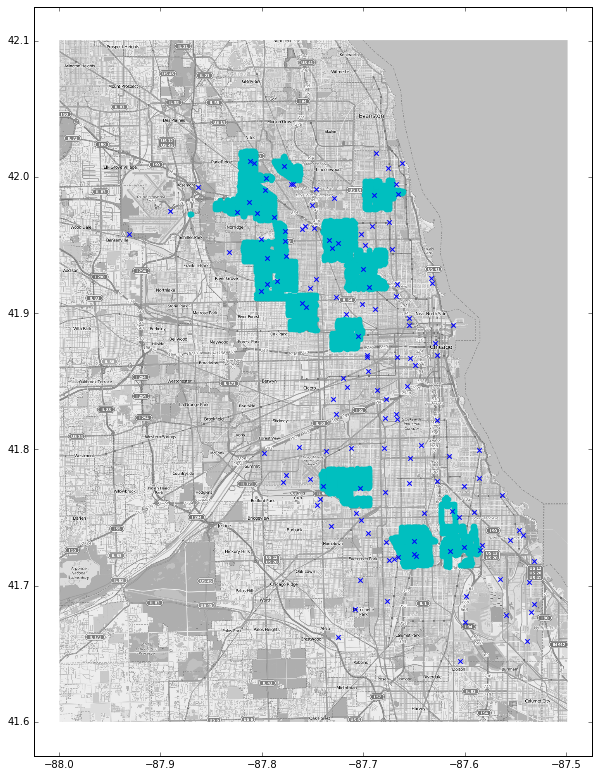

In [2]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
spray = pd.read_csv('../input/spray.csv')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

#drop rows with off-the-map locations
spray = spray[spray.Latitude < 42.2]
spray_locations = spray[['Longitude', 'Latitude']].drop_duplicates().values
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(spray_locations[:,0], spray_locations[:,1], marker='o', color = 'c')
plt.scatter(locations[:,0], locations[:,1], marker='x')

In [7]:
#plt.savefig('heatmap.png')